# Geometric art preprocessing
I downloaded hundreds of images from https://penabranca.co/ and manually sifted through them to filter out ones that were not geometric art. Let's standardize them! 

In [1]:
import os
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.exposure import rescale_intensity
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
image_paths = ['original/' + filename for filename in os.listdir('original')]
len(image_paths)

252

In [3]:
original = [imread(image_path, as_gray=True) for image_path in tqdm(image_paths)]

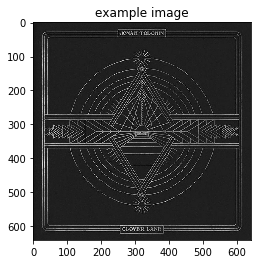

In [4]:
plt.title('example image')
plt.imshow(original[0], cmap='gray')
plt.show()

In [5]:
print(f'smallest image is {min([image.shape for image in original], key=lambda shape: np.prod(shape))}')
print(f'largest image is {max([image.shape for image in original], key=lambda shape: np.prod(shape))}')

smallest image is (320, 320)
largest image is (1350, 1080)


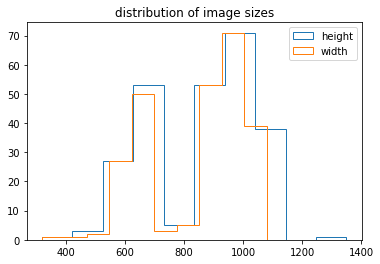

In [6]:
plt.title('distribution of image sizes')
plt.hist([image.shape[0] for image in original], label='height', histtype='step')
plt.hist([image.shape[1] for image in original], label='width', histtype='step')
plt.legend()
plt.show()

These images are pretty large for AI. Let's make them smol!

In [7]:
smaller_size = 128
smaller = np.array([resize(image, (smaller_size, smaller_size)) for image in tqdm(original)])

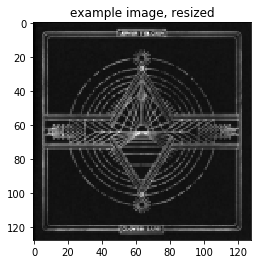

In [8]:
plt.title('example image, resized')
plt.imshow(smaller[0], cmap='gray')
plt.show()

That's still pretty big, but smaller would be illegible. We need to cut them! To preserve at least some of the symmetry, we're going to cut each image into 4 pieces in a 2x2 grid, as well as storing a 2x downsampled version.

In [9]:
def all_cuts(image):
    return [
        image[:image.shape[0] // 2, :image.shape[1] // 2],
        image[:image.shape[0] // 2, image.shape[1] // 2:],
        image[image.shape[0] // 2:, :image.shape[1] // 2],
        image[image.shape[0] // 2:, image.shape[1] // 2:],
    ]

In [10]:
cut = np.concatenate([all_cuts(image) for image in smaller])
smallest = np.array([resize(image, (smaller_size // 2, smaller_size // 2)) for image in tqdm(smaller)])
cut_and_smallest = np.concatenate((cut, smallest))

In [13]:
final = np.array([rescale_intensity(image) for image in tqdm(cut_and_smallest)])

Okay, let's do some more checks to see if this all makes sense in the end.

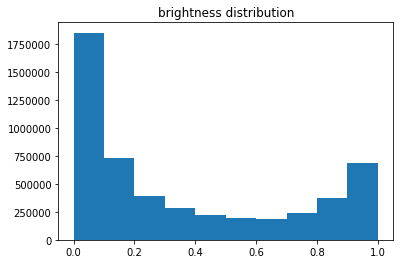

In [14]:
plt.title('brightness distribution')
plt.hist(final.ravel())
plt.show()

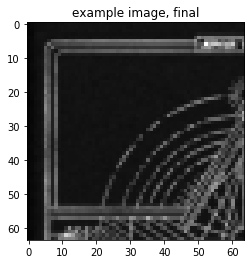

In [15]:
plt.title('example image, final')
plt.imshow(final[0], cmap='gray')
plt.show()

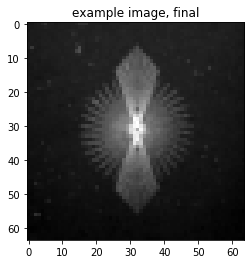

In [16]:
plt.title('example image, final')
plt.imshow(final[-1], cmap='gray')
plt.show()

In [17]:
np.save('processed.npy', final)